In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("Digital Personas Survey_ AI Influencers vs. Human Content Creators.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 56 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   Timestamp                                                                                                                        131 non-null    object 
 1   Total score                                                                                                                      131 non-null    object 
 2   Age                                                                                                                              131 non-null    object 
 3   Age [Score]                                                                                         

,Timestamp,Total score,Age,Age [Score],Age [Feedback],Gender,Gender [Score],Gender [Feedback],Highest Education Level (Obtained or Pursuing),Highest Education Level (Obtained or Pursuing) [Score],...,"In comparison to human influencers, AI influencers should be paid [Feedback]",For which of the following categories would you trust recommendations from an AI influencer? (select all that apply),For which of the following categories would you trust recommendations from an AI influencer? (select all that apply) [Score],For which of the following categories would you trust recommendations from an AI influencer? (select all that apply) [Feedback],Do you believe AI influencers impact beauty standards and self-image perceptions?,Do you believe AI influencers impact beauty standards and self-image perceptions? [Score],Do you believe AI influencers impact beauty standards and self-image perceptions? [Feedback],Should content created by AI influencers be clearly labeled as AI-generated?,Should content created by AI influencers be clearly labeled as AI-generated? [Score],Should content created by AI influencers be clearly labeled as AI-generated? [Feedback]
0,2025/03/03 6:57:55 PM MST,6.00 / 6,18-25,-- / 0,NaN,Female,-- / 0,NaN,Master's,-- / 0,...,NaN,Fashion & Beauty Products;Technology Products ...,-- / 0,NaN,Yes,-- / 0,NaN,Yes,-- / 0,NaN
1,2025/03/03 7:00:10 PM MST,6.00 / 6,18-25,-- / 0,NaN,Female,-- / 0,NaN,Master's,-- / 0,...,NaN,Fashion & Beauty Products;None of the above,-- / 0,NaN,Yes,-- / 0,NaN,Yes,-- / 0,NaN
2,2025/03/04 8:31:16 AM MST,4.00 / 6,50,-- / 0,NaN,Prefer not to say,-- / 0,NaN,High school or lower,-- / 0,...,NaN,None of the above,-- / 0,NaN,Yes,-- / 0,NaN,I don't care,-- / 0,NaN
3,2025/03/05 3:48:41 PM MST,3.00 / 6,18-25,-- / 0,NaN,Female,-- / 0,NaN,Master's,-- / 0,...,NaN,Technology Products & Services;Travel;Health &...,-- / 0,NaN,Yes,-- / 0,NaN,Yes,-- / 0,NaN
4,2025/03/05 3:49:55 PM MST,4.00 / 6,18-25,-- / 0,NaN,Male,-- / 0,NaN,Master's,-- / 0,...,NaN,None of the above,-- / 0,NaN,No,-- / 0,NaN,Yes,-- / 0,NaN


In [26]:
# print different Age column values
print(df['Age'].unique())


['18-25' '50' '25-35' '35-50' '<18']


/var/folders/dy/rpb7rpv157z3q6x9sxqz6jtc0000gn/T/ipykernel_55784/751492445.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Age"], order=df["Age"].value_counts().index, palette="viridis")


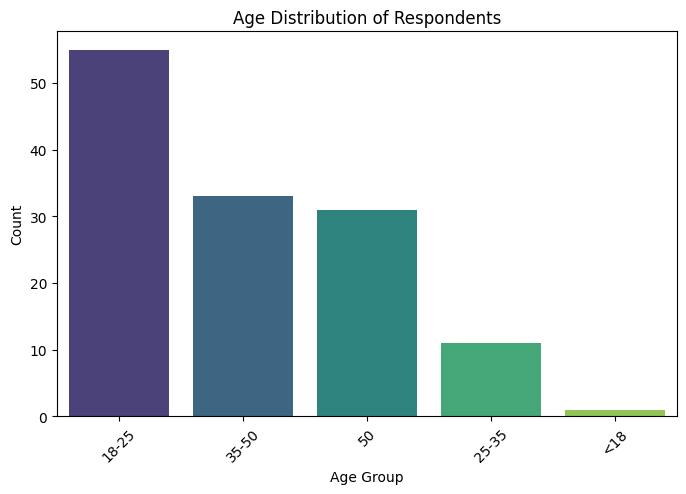

In [27]:
import seaborn as sns

# Plot age distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Age"], order=df["Age"].value_counts().index, palette="viridis")
plt.title("Age Distribution of Respondents")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [28]:
print(df.columns)

Index(['Timestamp', 'Total score', 'Age', 'Age [Score]', 'Age [Feedback]',
       'Gender', 'Gender [Score]', 'Gender [Feedback]',
       'Highest Education Level (Obtained or Pursuing)',
       'Highest Education Level (Obtained or Pursuing) [Score]',
       'Highest Education Level (Obtained or Pursuing) [Feedback]',
       'Where are you located?', 'Where are you located? [Score]',
       'Where are you located? [Feedback]',
       'How long do you spend on Instagram in a day?',
       'How long do you spend on Instagram in a day? [Score]',
       'How long do you spend on Instagram in a day? [Feedback]',
       'Have you heard of AI influencers?',
       'Have you heard of AI influencers? [Score]',
       'Have you heard of AI influencers? [Feedback]',
       'Have you ever followed or interacted with an AI influencer?',
       'Have you ever followed or interacted with an AI influencer? [Score]',
       'Have you ever followed or interacted with an AI influencer? [Feedback]',
    

Percentage of people who got Q1 correct: 46.56%


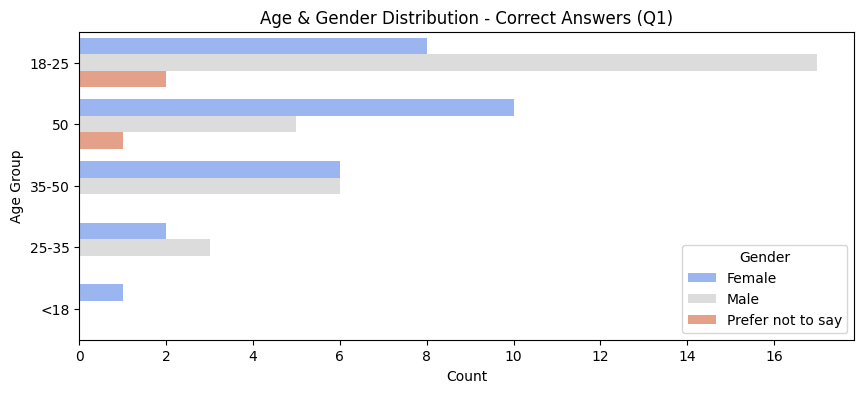

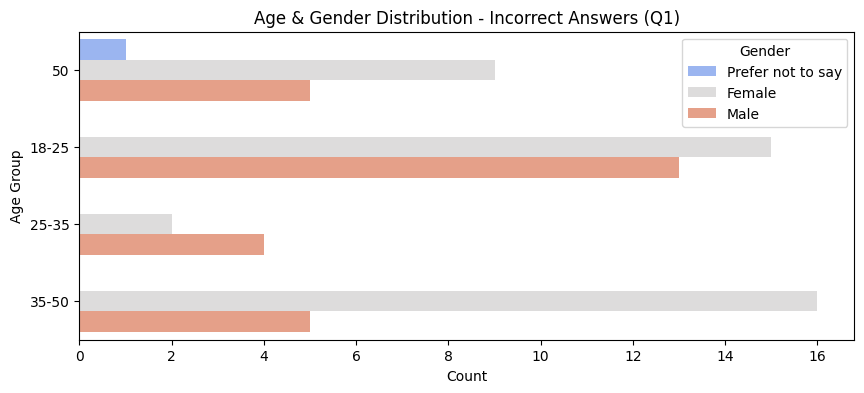

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


def analyze_question(df, question_col_prefix, age_col="Age", gender_col="Gender"):
    """
    Analyzes a specific question by visualizing the percentage of correct responses,
    and demographic distributions for those who got it right vs. wrong.

    Parameters:
    df (DataFrame): The dataset.
    question_col_prefix (str): Prefix of the question column (e.g., "Q1").
    age_col (str): Column name representing age.
    gender_col (str): Column name representing gender.
    """

    question_index = df.columns.get_loc(question_col_prefix)
    score_col = df.columns[question_index + 1]  # The next 

    # Extract correct and incorrect responses
    correct_responses = df[df[score_col] == "1.00 / 1"]
    incorrect_responses = df[df[score_col] != "1.00 / 1"]

    # Calculate percentage of correct responses
    total_responses = len(df)
    correct_percentage = (len(correct_responses) / total_responses) * 100

    # Print the percentage of people who got it right
    print(f"Percentage of people who got {question_col_prefix} correct: {correct_percentage:.2f}%")

    # Demographics of correct responses
    plt.figure(figsize=(10, 4))
    sns.countplot(y=correct_responses[age_col], hue=correct_responses[gender_col], palette="coolwarm")
    plt.title(f"Age & Gender Distribution - Correct Answers ({question_col_prefix})")
    plt.xlabel("Count")
    plt.ylabel("Age Group")
    plt.legend(title="Gender")
    plt.show()

    # Demographics of incorrect responses
    plt.figure(figsize=(10, 4))
    sns.countplot(y=incorrect_responses[age_col], hue=incorrect_responses[gender_col], palette="coolwarm")
    plt.title(f"Age & Gender Distribution - Incorrect Answers ({question_col_prefix})")
    plt.xlabel("Count")
    plt.ylabel("Age Group")
    plt.legend(title="Gender")
    plt.show()

    return correct_responses[[age_col, gender_col]], incorrect_responses[[age_col, gender_col]]

# Example usage (replace "Q1" with the actual prefix from your dataset)
correct_demo, incorrect_demo = analyze_question(df, "Q1")


Percentage of people who heard of AI influencers and got Q1 correct: 50.51%
Percentage of people who haven't heard of AI influencers and got Q1 correct: 34.38%
Percentage of people who heard of AI influencers and got Q2 correct: 41.41%
Percentage of people who haven't heard of AI influencers and got Q2 correct: 43.75%
Percentage of people who heard of AI influencers and got Q3 correct: 59.60%
Percentage of people who haven't heard of AI influencers and got Q3 correct: 46.88%
Percentage of people who heard of AI influencers and got Q4 correct: 69.70%
Percentage of people who haven't heard of AI influencers and got Q4 correct: 53.12%
Percentage of people who heard of AI influencers and got Q5 correct: 43.43%
Percentage of people who haven't heard of AI influencers and got Q5 correct: 25.00%
Percentage of people who heard of AI influencers and got Q6 correct: 87.88%
Percentage of people who haven't heard of AI influencers and got Q6 correct: 90.62%
Average percentage of people who got que

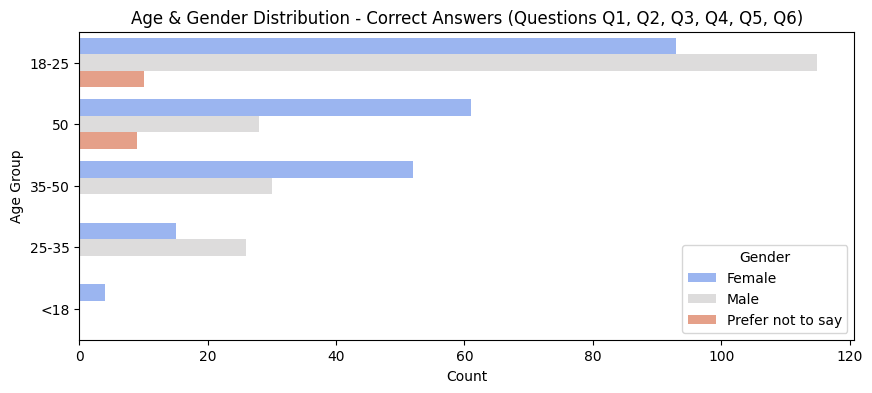

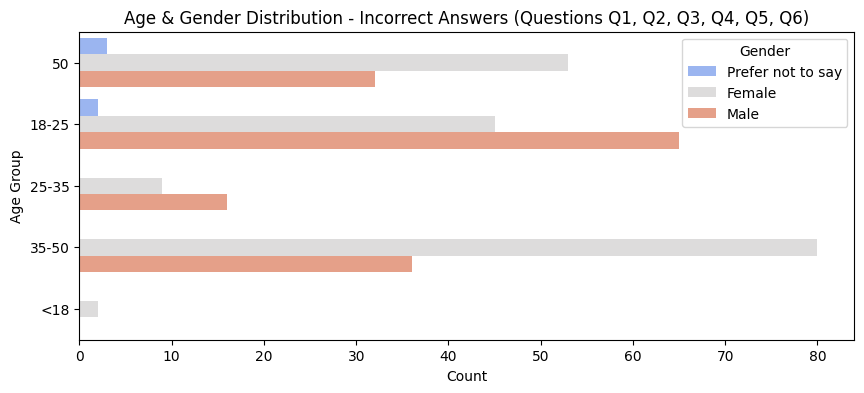

In [30]:
def analyze_multiple_questions(df, question_col_prefixes, age_col="Age", gender_col="Gender"):
    """
    Analyzes multiple questions by visualizing the average percentage of correct responses,
    and demographic distributions for those who got it right vs. wrong.

    Parameters:
    df (DataFrame): The dataset.
    question_col_prefixes (list): List of prefixes of the question columns (e.g., ["Q1", "Q2"]).
    age_col (str): Column name representing age.
    gender_col (str): Column name representing gender.
    """

    total_correct_responses = 0
    total_responses = len(df)
    correct_responses_list = []
    incorrect_responses_list = []

    for question_col_prefix in question_col_prefixes:
        question_index = df.columns.get_loc(question_col_prefix)
        score_col = df.columns[question_index + 1]  # The next column is the score column

        # Extract correct and incorrect responses
        correct_responses = df[df[score_col] == "1.00 / 1"]
        incorrect_responses = df[df[score_col] != "1.00 / 1"]

        heard_of_ai_col = 'Have you heard of AI influencers?'
        heard_of_ai_yes = df[df[heard_of_ai_col] == 'Yes']
        heard_of_ai_no = df[df[heard_of_ai_col] == 'No']

        correct_responses_yes = heard_of_ai_yes[heard_of_ai_yes[score_col] == "1.00 / 1"]
        correct_responses_no = heard_of_ai_no[heard_of_ai_no[score_col] == "1.00 / 1"]

        print(f"Percentage of people who heard of AI influencers and got {question_col_prefix} correct: {(len(correct_responses_yes) / len(heard_of_ai_yes)) * 100:.2f}%")
        print(f"Percentage of people who haven't heard of AI influencers and got {question_col_prefix} correct: {(len(correct_responses_no) / len(heard_of_ai_no)) * 100:.2f}%")

        total_correct_responses += len(correct_responses)
        correct_responses_list.append(correct_responses)
        incorrect_responses_list.append(incorrect_responses)

    # Calculate average percentage of correct responses
    average_correct_percentage = (total_correct_responses / (total_responses * len(question_col_prefixes))) * 100

    # Print the average percentage of people who got the questions correct
    print(f"Average percentage of people who got questions {', '.join(question_col_prefixes)} correct: {average_correct_percentage:.2f}%")

    # Combine correct and incorrect responses for demographic analysis
    combined_correct_responses = pd.concat(correct_responses_list)
    combined_incorrect_responses = pd.concat(incorrect_responses_list)

    # Demographics of correct responses
    plt.figure(figsize=(10, 4))
    sns.countplot(y=combined_correct_responses[age_col], hue=combined_correct_responses[gender_col], palette="coolwarm")
    plt.title(f"Age & Gender Distribution - Correct Answers (Questions {', '.join(question_col_prefixes)})")
    plt.xlabel("Count")
    plt.ylabel("Age Group")
    plt.legend(title="Gender")
    plt.show()

    # Demographics of incorrect responses
    plt.figure(figsize=(10, 4))
    sns.countplot(y=combined_incorrect_responses[age_col], hue=combined_incorrect_responses[gender_col], palette="coolwarm")
    plt.title(f"Age & Gender Distribution - Incorrect Answers (Questions {', '.join(question_col_prefixes)})")
    plt.xlabel("Count")
    plt.ylabel("Age Group")
    plt.legend(title="Gender")
    plt.show()

    return combined_correct_responses[[age_col, gender_col]], combined_incorrect_responses[[age_col, gender_col]]

# Example usage

correct_demo, incorrect_demo = analyze_multiple_questions(df, ["Q1","Q2","Q3","Q4","Q5","Q6"])

In [31]:
df["Gender"].value_counts()

Gender
Female               69
Male                 58
Prefer not to say     4
Name: count, dtype: int64

/var/folders/dy/rpb7rpv157z3q6x9sxqz6jtc0000gn/T/ipykernel_55784/2368036448.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([age_col, gender_col]).agg(


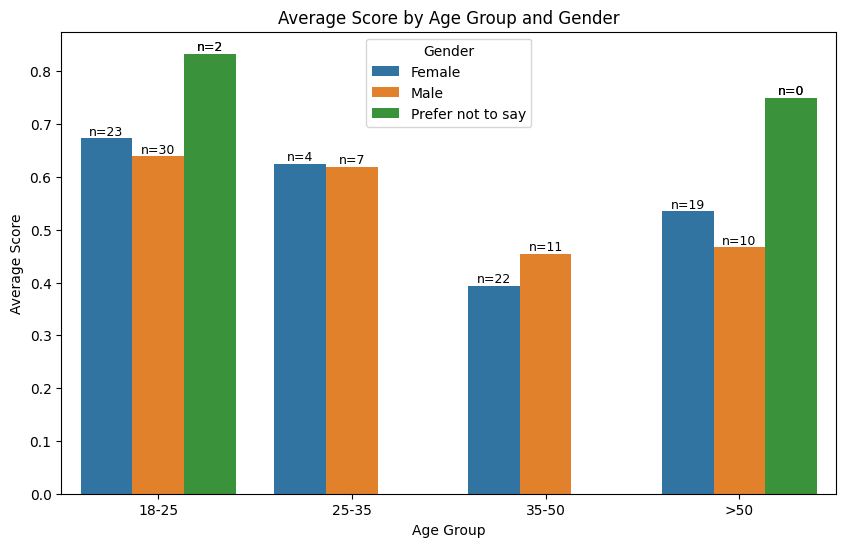

In [32]:
def plot_avg_score_by_age_gender(df, question_col_prefixes, age_col="Age", gender_col="Gender"):
    """
    Plots the average score (across all specified questions) for each age group,
    with different bars for each gender. Also annotates each bar with the number
    of respondents (count) used in that subgroup.
    
    This version renames "50" to ">50", sets a custom age order, and computes counts.
    
    Parameters:
      df : DataFrame
          The dataset.
      question_col_prefixes : list
          List of question column prefixes (e.g., ["Q1", "Q2", ...]).
      age_col : str
          Column name for age.
      gender_col : str
          Column name for gender.
    
    Returns:
      grouped : DataFrame
          A DataFrame containing the average score and count for each age and gender group.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # 1. Rename "50" to ">50" and define custom age order
    df[age_col] = df[age_col].replace({"50": ">50"})
    age_order = ["18-25", "25-35", "35-50", ">50"]
    df[age_col] = pd.Categorical(df[age_col], categories=age_order, ordered=True)
    
    # 2. Identify score columns for each question prefix
    score_cols = []
    for prefix in question_col_prefixes:
        question_index = df.columns.get_loc(prefix)
        score_col = df.columns[question_index + 1]  # Assumes score column follows question column
        score_cols.append(score_col)
    
    # 3. Extract numeric score from strings like "1.00 / 1"
    for col in score_cols:
        df[col + "_num"] = df[col].apply(lambda x: float(x.split(" / ")[0])
                                           if isinstance(x, str) and " / " in x else None)
    numeric_score_cols = [col + "_num" for col in score_cols]
    
    # 4. Compute average score across all specified questions for each respondent
    df["avg_score"] = df[numeric_score_cols].mean(axis=1)
    
    # 5. Group by age & gender to compute both mean average score and count
    grouped = df.groupby([age_col, gender_col]).agg(
        avg_score=("avg_score", "mean"),
        count=("avg_score", "size")
    ).reset_index()
    
    # Sort the grouped DataFrame by the ordered age category
    grouped = grouped.sort_values(by=age_col)
    
    # 6. Plot the average score by age and gender
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=age_col,
        y="avg_score",
        hue=gender_col,
        data=grouped,
        order=age_order  # ensure the custom order is used on the x-axis
    )
    plt.title("Average Score by Age Group and Gender")
    plt.xlabel("Age Group")
    plt.ylabel("Average Score")
    plt.legend(title="Gender")
    
    # 7. Annotate each bar with the count of respondents
    # Get the hue labels from the legend (e.g., Male, Female)
    _, hue_labels = ax.get_legend_handles_labels()
    
    # For each hue group, extract the corresponding subset from the grouped DataFrame,
    # sorted by age_order. Then annotate each bar with "n=<count>".
    for container, hue_label in zip(ax.containers, hue_labels):
        # Subset of grouped data for the current gender
        sub = grouped[grouped[gender_col] == hue_label].copy()
        sub = sub.sort_values(by=age_col)
        # Create count labels
        count_labels = [f"n={int(c)}" for c in sub["count"]]
        # Annotate each bar in the container with its corresponding count label
        # (Using ax.bar_label if available; otherwise, manual annotation)
        try:
            ax.bar_label(container, labels=count_labels, label_type='edge', fontsize=9)
        except Exception:
            for bar, label in zip(container, count_labels):
                if bar is not None:
                    ax.text(
                        bar.get_x() + bar.get_width() / 2,
                        bar.get_height(),
                        label,
                        ha='center',
                        va='bottom',
                        fontsize=9
                    )
    
    plt.show()
    
    return grouped

# Example usage:
grouped_scores = plot_avg_score_by_age_gender(df, ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"])



In [33]:
def count_people_by_age_and_gender(df, age_col="Age", gender_col="Gender"):
    """
    Returns a DataFrame with the count of people for each combination of age group and gender.
    
    The function:
      - Renames "50" to ">50" in the age column.
      - Converts the age column to an ordered categorical type with the order:
        ["<18", "18-25", "25-35", "35-50", ">50"].
      - Groups the DataFrame by age and gender.
      - Returns a pivoted table with age groups as rows and genders as columns.
    
    Parameters:
      df (DataFrame): The input DataFrame.
      age_col (str): The name of the age column (default "Age").
      gender_col (str): The name of the gender column (default "Gender").
    
    Returns:
      DataFrame: A pivot table with counts for each age and gender combination.
    """
    import pandas as pd

    # Work on a copy of the DataFrame
    df_copy = df.copy()
    
    # Rename "50" to ">50"
    df_copy[age_col] = df_copy[age_col].replace({"50": ">50"})
    
    # Define and apply custom order for age groups
    age_order = ["<18", "18-25", "25-35", "35-50", ">50"]
    df_copy[age_col] = pd.Categorical(df_copy[age_col], categories=age_order, ordered=True)
    
    # Group by age and gender, counting the number of occurrences
    grouped = df_copy.groupby([age_col, gender_col]).size().reset_index(name="count")
    
    # Pivot the table to have age groups as rows and genders as columns, filling missing values with 0
    result = grouped.pivot(index=age_col, columns=gender_col, values="count").fillna(0).astype(int)
    
    return result

# Example usage:
counts_df = count_people_by_age_and_gender(df)
print(counts_df)


Gender  Female  Male  Prefer not to say
Age                                    
<18          0     0                  0
18-25       23    30                  2
25-35        4     7                  0
35-50       22    11                  0
>50         19    10                  2


/var/folders/dy/rpb7rpv157z3q6x9sxqz6jtc0000gn/T/ipykernel_55784/4064981630.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_copy.groupby([age_col, gender_col]).size().reset_index(name="count")


In [34]:
df["Gender"].value_counts()

Gender
Female               69
Male                 58
Prefer not to say     4
Name: count, dtype: int64

/var/folders/dy/rpb7rpv157z3q6x9sxqz6jtc0000gn/T/ipykernel_55784/1387039019.py:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(age_col).agg(avg_score=("avg_score", "mean"), count=("avg_score", "count")).reset_index()


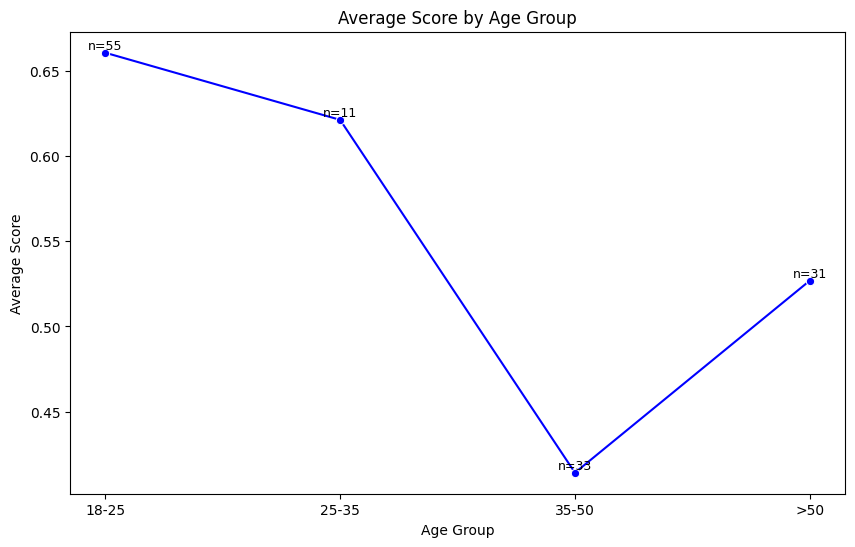

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_avg_score_by_age_gender_with_counts(df, question_col_prefixes, age_col="Age"):
    """
    Plots the average score for each age group as a line plot and annotates each point with the sample count.
    """
    # 1. Clean and order the Age data
    df[age_col] = df[age_col].replace({"50": ">50"})
    age_order = ["18-25", "25-35", "35-50", ">50"]
    df[age_col] = pd.Categorical(df[age_col], categories=age_order, ordered=True)
    
    # 2. Identify score columns and compute numeric scores
    score_cols = []
    for prefix in question_col_prefixes:
        question_index = df.columns.get_loc(prefix)
        score_col = df.columns[question_index + 1]
        score_cols.append(score_col)
    
    for col in score_cols:
        df[col + "_num"] = df[col].apply(
            lambda x: float(x.split(" / ")[0]) if isinstance(x, str) and " / " in x else None
        )
    numeric_score_cols = [col + "_num" for col in score_cols]
    
    # 3. Compute each respondent's average score
    df["avg_score"] = df[numeric_score_cols].mean(axis=1)
    
    # 4. Group by Age to compute mean average score and sample count
    grouped = df.groupby(age_col).agg(avg_score=("avg_score", "mean"), count=("avg_score", "count")).reset_index()
    grouped = grouped.sort_values(by=age_col)
    # 5. Create the Line Plot
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(
        x=age_col,
        y="avg_score",
        data=grouped,
        marker="o",
        color='b'
    )
    
    plt.title("Average Score by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Average Score")
    
    # 6. Annotate Each Point with the Sample Count
    for i, row in grouped.iterrows():

        x = i
        y = row["avg_score"]
        count = row["count"]
        plt.text(x, y, f"n={count}", ha="center", va="bottom", fontsize=9)
    
    plt.show()
    return grouped


# Example usage:
grouped_scores = plot_avg_score_by_age_gender_with_counts(df, ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"])


/var/folders/dy/rpb7rpv157z3q6x9sxqz6jtc0000gn/T/ipykernel_55784/4060554434.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(age_col).agg(avg_score=("avg_score", "mean"), count=("avg_score", "count")).reset_index()


     Age  avg_score  count
0  18-25   0.660606     55
1  25-35   0.621212     11
2  35-50   0.414141     33
3    >50   0.526882     31


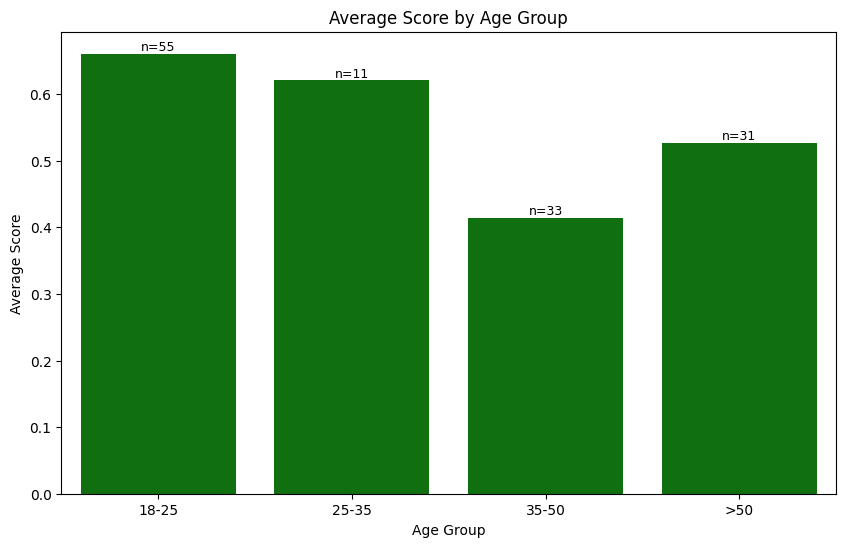

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_avg_score_by_age_gender_with_counts(df, question_col_prefixes, age_col="Age"):
    """
    Plots the average score for each age group and annotates each bar with the sample count.
    """
    # 1. Clean and order the Age data
    df[age_col] = df[age_col].replace({"50": ">50"})
    age_order = ["18-25", "25-35", "35-50", ">50"]
    df[age_col] = pd.Categorical(df[age_col], categories=age_order, ordered=True)
    
    # 2. Identify score columns and compute numeric scores
    score_cols = []
    for prefix in question_col_prefixes:
        question_index = df.columns.get_loc(prefix)
        score_col = df.columns[question_index + 1]
        score_cols.append(score_col)
    
    for col in score_cols:
        df[col + "_num"] = df[col].apply(
            lambda x: float(x.split(" / ")[0]) if isinstance(x, str) and " / " in x else None
        )
    numeric_score_cols = [col + "_num" for col in score_cols]
    
    # 3. Compute each respondent's average score
    df["avg_score"] = df[numeric_score_cols].mean(axis=1)
    
    # 4. Group by Age to compute mean average score and sample count
    grouped = df.groupby(age_col).agg(avg_score=("avg_score", "mean"), count=("avg_score", "count")).reset_index()
    grouped = grouped.sort_values(by=age_col)
    print(grouped)
    # 5. Create the Bar Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=age_col,
        y="avg_score",
        data=grouped,
        order=age_order,
        color='g'  # Single color since gender is removed
    )
    
    plt.title("Average Score by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Average Score")
    
    # 6. Annotate Each Bar with the Sample Count
    for i, patch in enumerate(ax.patches):
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        count = grouped.loc[i, "count"]
        ax.text(x, y, f"n={count}", ha="center", va="bottom", fontsize=9)
    
    plt.show()
    return grouped
# Example usage:
grouped_scores = plot_avg_score_by_age_gender_with_counts(df, ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"])


/var/folders/dy/rpb7rpv157z3q6x9sxqz6jtc0000gn/T/ipykernel_55784/1645870172.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([age_col, gender_col])["avg_score"].mean().reset_index()


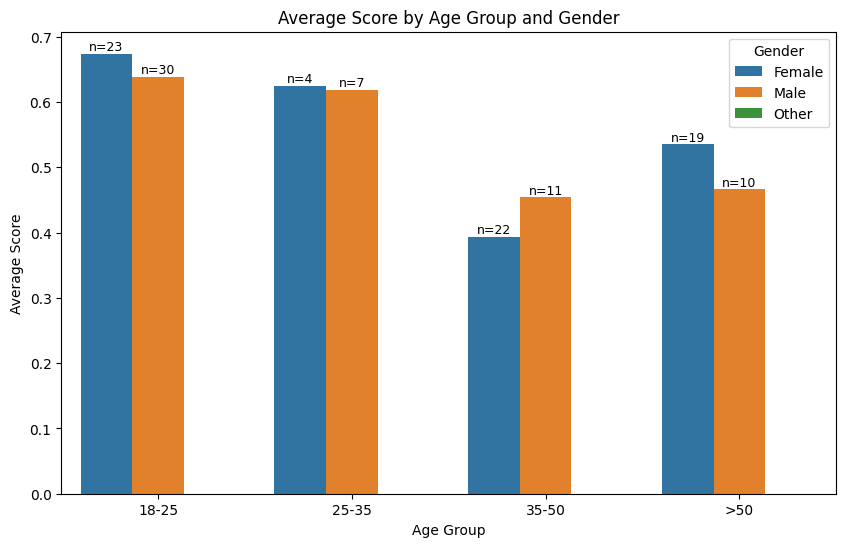

In [37]:

def plot_avg_score_by_age_gender_with_counts(df, question_col_prefixes, age_col="Age", gender_col="Gender"):
  """
  Plots the average score (across all specified questions) for each age group,
  with different bars for each gender, and annotates each bar with a hard-coded
  sample count for that Age–Gender combination.
  """
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  
  # 1. Clean and order the Age data
  df[age_col] = df[age_col].replace({"50": ">50"})
#   df[gender_col] = df[gender_col].replace("Prefer not to say", "Other")

  age_order = ["18-25", "25-35", "35-50", ">50"]
  df[age_col] = pd.Categorical(df[age_col], categories=age_order, ordered=True)
  
  # 2. Identify score columns and compute numeric scores
  score_cols = []
  for prefix in question_col_prefixes:
      question_index = df.columns.get_loc(prefix)
      score_col = df.columns[question_index + 1]
      score_cols.append(score_col)
  
  for col in score_cols:
      df[col + "_num"] = df[col].apply(
          lambda x: float(x.split(" / ")[0]) if isinstance(x, str) and " / " in x else None
      )
  numeric_score_cols = [col + "_num" for col in score_cols]
  
  # 3. Compute each respondent's average score
  df["avg_score"] = df[numeric_score_cols].mean(axis=1)
  
  # 4. Group by Age & Gender to compute mean average score
  grouped = df.groupby([age_col, gender_col])["avg_score"].mean().reset_index()
  grouped = grouped.sort_values(by=age_col)
  
  # 5. Hard-coded counts for each Age–Gender combination
  counts_df = pd.DataFrame({
      "Female": [23, 4, 22, 19],
      "Male": [30, 7, 11, 10],
      "Other": [2, 0, 0, 2]
  }, index=age_order)
  
  # 6. Create the Bar Plot
  plt.figure(figsize=(10, 6))
  hue_order = ["Female", "Male", "Other"]
  ax = sns.barplot(
      x=age_col,
      y="avg_score",
      hue=gender_col,
      data=grouped,
      order=age_order,
      hue_order=hue_order
  )
  plt.title("Average Score by Age Group and Gender")
  plt.xlabel("Age Group")
  plt.ylabel("Average Score")
  plt.legend(title="Gender")
  
  # 7. Annotate Each Bar with the Hard-coded Count
  #    Use the index to force the container to match the correct hue
  for i, gender in enumerate(hue_order):
        container = ax.containers[i]
        count_values = counts_df[gender].values  # array of counts in the correct age order

        # remove 0 from count_values
        count_values = [x for x in count_values if x != 0]
        for patch, count in zip(container, count_values):
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_height()
            # print(x,y,count)
            ax.text(x, y, f"n={count}", ha="center", va="bottom", fontsize=9)
  
  plt.show()
  return grouped,plt

grouped_scores,plt = plot_avg_score_by_age_gender_with_counts(df, ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"])




In [38]:
# select specific columns from df to new dataframe
df1 = df[['Is it ethical for AI-generated influencers to promote commercial products?','In comparison to human influencers, AI influencers should be paid','Do you believe AI influencers impact beauty standards and self-image perceptions?','Should content created by AI influencers be clearly labeled as AI-generated?']]
df1

,Is it ethical for AI-generated influencers to promote commercial products?,"In comparison to human influencers, AI influencers should be paid",Do you believe AI influencers impact beauty standards and self-image perceptions?,Should content created by AI influencers be clearly labeled as AI-generated?
0,Unethical,Lesser,Yes,Yes
1,Unethical,Equally,Yes,Yes
2,Unethical,Equally,Yes,I don't care
3,Neutral,Lesser,Yes,Yes
4,Neutral,Equally,No,Yes
...,...,...,...,...
126,Neutral,Equally,I don't know,Yes
127,Neutral,Equally,Yes,Yes
128,Unethical,Equally,Yes,Yes
129,Ethical,Lesser,Yes,Yes


Contingency Table (Ethical vs. Impact):
impact     I don't know  No  Yes
ethical                         
Ethical               8   5   16
Neutral              20   4   30
Unethical            10   5   33


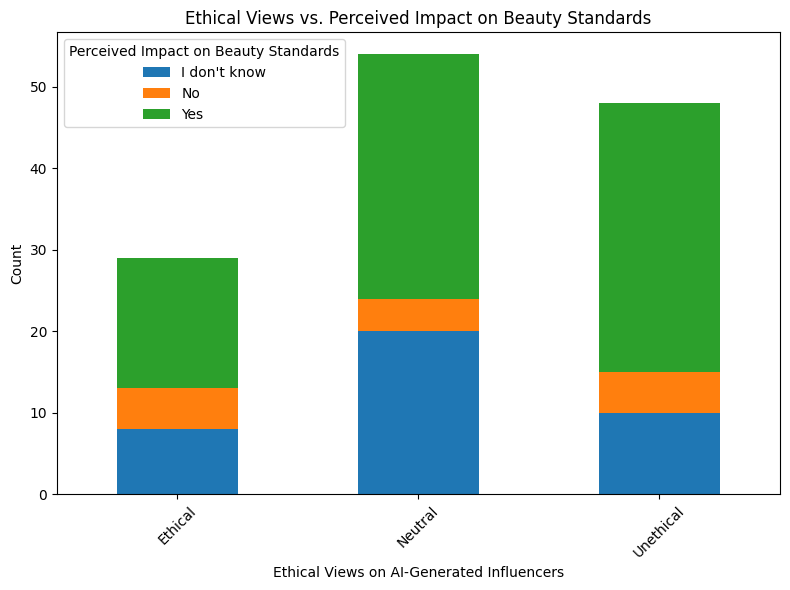

Chi-square test p-value (Ethical vs. Impact): 0.2940


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assume your original dataframe is loaded as df1
# Rename columns for easier reference
df = df1.rename(columns={
    "Is it ethical for AI-generated influencers to promote commercial products?": "ethical",
    "In comparison to human influencers, AI influencers should be paid": "paid",
    "Do you believe AI influencers impact beauty standards and self-image perceptions?": "impact",
    "Should content created by AI influencers be clearly labeled as AI-generated?": "label"
})

# Create a crosstab with 'ethical' on the x-axis and 'impact' as categories
ct_ethical_impact = pd.crosstab(df['ethical'], df['impact'])

# Print the contingency table with switched axes
print("Contingency Table (Ethical vs. Impact):")
print(ct_ethical_impact)

# Plot the stacked bar chart with ethical on the x-axis
ct_ethical_impact.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Ethical Views vs. Perceived Impact on Beauty Standards')
plt.xlabel('Ethical Views on AI-Generated Influencers')
plt.ylabel('Count')
plt.legend(title='Perceived Impact on Beauty Standards')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Perform the Chi-square test for independence
chi2, p, dof, expected = chi2_contingency(ct_ethical_impact)
print(f"Chi-square test p-value (Ethical vs. Impact): {p:.4f}")


Contingency Table (Impact vs. Ethical):
ethical       Ethical  Neutral  Unethical
impact                                   
I don't know        8       20         10
No                  5        4          5
Yes                16       30         33


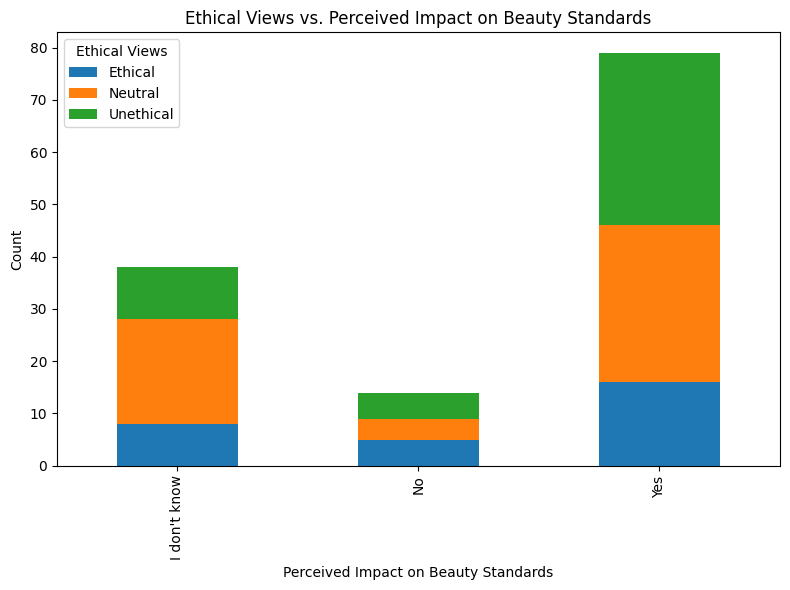

Chi-square test p-value (Impact vs. Ethical): 0.2940


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assume your original dataframe is loaded as df.
# For easier reference, rename columns.
df = df1.rename(columns={
    "Is it ethical for AI-generated influencers to promote commercial products?": "ethical",
    "In comparison to human influencers, AI influencers should be paid": "paid",
    "Do you believe AI influencers impact beauty standards and self-image perceptions?": "impact",
    "Should content created by AI influencers be clearly labeled as AI-generated?": "label"
})

# Create a crosstab for hypothesis 1.
ct_impact_ethics = pd.crosstab(df['impact'], df['ethical'])
print("Contingency Table (Impact vs. Ethical):")
print(ct_impact_ethics)

# Plot the stacked bar chart.
ct_impact_ethics.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Ethical Views vs. Perceived Impact on Beauty Standards')
plt.xlabel('Perceived Impact on Beauty Standards')
plt.ylabel('Count')
plt.legend(title='Ethical Views')
plt.tight_layout()
plt.show()

# Chi-square test for hypothesis 1.
chi2, p, dof, expected = chi2_contingency(ct_impact_ethics)
print(f"Chi-square test p-value (Impact vs. Ethical): {p:.4f}")


Contingency Table (Impact vs. Ethical):
ethical       Ethical  Neutral  Unethical
impact                                   
I don't know        8       20         10
No                  5        4          5
Yes                16       30         33


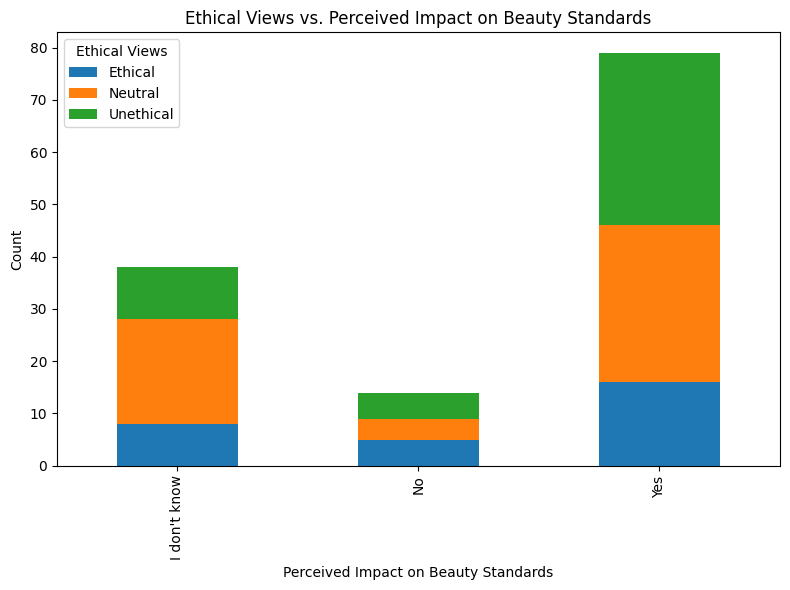

Chi-square test p-value (Impact vs. Ethical): 0.2940


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assume your original dataframe is loaded as df.
# For easier reference, rename columns.
df = df.rename(columns={
    "Is it ethical for AI-generated influencers to promote commercial products?": "ethical",
    "In comparison to human influencers, AI influencers should be paid": "paid",
    "Do you believe AI influencers impact beauty standards and self-image perceptions?": "impact",
    "Should content created by AI influencers be clearly labeled as AI-generated?": "label"
})

# Create a crosstab for hypothesis 1.
ct_impact_ethics = pd.crosstab(df['impact'], df['ethical'])
print("Contingency Table (Impact vs. Ethical):")
print(ct_impact_ethics)

# Plot the stacked bar chart.
ct_impact_ethics.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Ethical Views vs. Perceived Impact on Beauty Standards')
plt.xlabel('Perceived Impact on Beauty Standards')
plt.ylabel('Count')
plt.legend(title='Ethical Views')
plt.tight_layout()
plt.show()

# Chi-square test for hypothesis 1.
chi2, p, dof, expected = chi2_contingency(ct_impact_ethics)
print(f"Chi-square test p-value (Impact vs. Ethical): {p:.4f}")


Pairwise Chi-square Test p-values:
          ethical      paid    impact     label
ethical       NaN  0.520252  0.294044  0.298842
paid     0.520252       NaN    0.2943  0.082775
impact   0.294044    0.2943       NaN  0.068723
label    0.298842  0.082775  0.068723       NaN


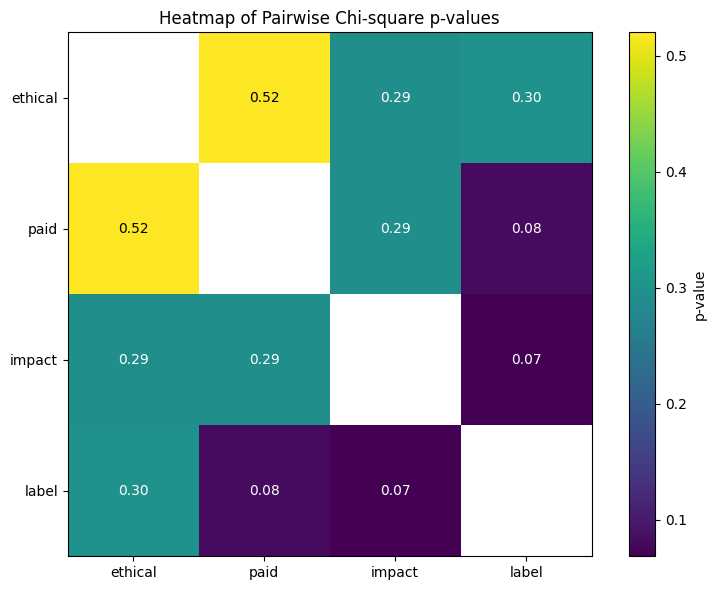

In [42]:
import itertools
import numpy as np
from scipy.stats import chi2_contingency

columns = ['ethical', 'paid', 'impact', 'label']
p_values = pd.DataFrame(index=columns, columns=columns)

# Calculate chi-square test p-values for each pair of columns.
for col1, col2 in itertools.combinations(columns, 2):
    ct = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, ex = chi2_contingency(ct)
    p_values.loc[col1, col2] = p
    p_values.loc[col2, col1] = p

print("Pairwise Chi-square Test p-values:")
print(p_values)

# Plot the heatmap using matplotlib.
plt.figure(figsize=(8,6))
im = plt.imshow(p_values.astype(float), cmap='viridis', interpolation='nearest')
plt.colorbar(im, label='p-value')
plt.xticks(ticks=range(len(columns)), labels=columns)
plt.yticks(ticks=range(len(columns)), labels=columns)
plt.title('Heatmap of Pairwise Chi-square p-values')
# Annotate cells with p-value numbers.
for i in range(len(columns)):
    for j in range(len(columns)):
        if i != j and not pd.isnull(p_values.iloc[i,j]):
            plt.text(j, i, f'{float(p_values.iloc[i,j]):.2f}', ha='center', va='center',
                     color='white' if float(p_values.iloc[i,j]) < 0.5 else 'black')
plt.tight_layout()
plt.show()


In [43]:
df

,ethical,paid,impact,label
0,Unethical,Lesser,Yes,Yes
1,Unethical,Equally,Yes,Yes
2,Unethical,Equally,Yes,I don't care
3,Neutral,Lesser,Yes,Yes
4,Neutral,Equally,No,Yes
...,...,...,...,...
126,Neutral,Equally,I don't know,Yes
127,Neutral,Equally,Yes,Yes
128,Unethical,Equally,Yes,Yes
129,Ethical,Lesser,Yes,Yes
